In [ ]:
# 1.0
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRD6aYw4M_2XLqFYtLeq8vne6ZhNiHk0AfZdZvz64MNgC7SugGjKzn7FNG9iPUHoVyYs7augxXsDnPR/pub?gid=315529156&single=true&output=csv')

# Exploration

In [ ]:
raw.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
raw.Outcome.unique()

array([1, 0])

In [ ]:
raw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
raw.DiabetesPedigreeFunction.max()

2.42

# Prep


In [ ]:
raw

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
new2=raw[['Pregnancies','Outcome']]
new2

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [ ]:
# replace 0 with NaN
to_re=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
new=raw[to_re].replace(0, np.nan)
new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,NaN,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,NaN,30.1,0.349,47


In [ ]:
# df_mul=pd.DataFrame(columns=raw.columns)
# for idx, value in raw[to_re].iterrows():
#   #print(value)
#   #print(value.to_list().count(0))
#   if value.to_list().count(0)>=3:
#     df_mul.iloc[-1]=value.to_list()
# df_mul

In [ ]:
df2=pd.concat([new,new2],axis=1)
df2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,NaN,33.6,0.627,50,6,1
1,85.0,66.0,29.0,NaN,26.6,0.351,31,1,0
2,183.0,64.0,NaN,NaN,23.3,0.672,32,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63,10,0
764,122.0,70.0,27.0,NaN,36.8,0.340,27,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30,5,0
766,126.0,60.0,NaN,NaN,30.1,0.349,47,1,1


In [ ]:
df2.isnull().sum(axis=0)

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Pregnancies                   0
Outcome                       0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   763 non-null    float64
 1   BloodPressure             733 non-null    float64
 2   SkinThickness             541 non-null    float64
 3   Insulin                   394 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Pregnancies               768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
# df3 = df2.dropna(thresh=1)
# df3

In [ ]:
# df2.dropna(subset=to_re, thresh= , inplace=True)
# df4 = df4.iloc[df3.isnull(axis=1).count() >= 3]
# df2

In [ ]:
df2.tail()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
763,101.0,76.0,48.0,180.0,32.9,0.171,63,10,0
764,122.0,70.0,27.0,NaN,36.8,0.340,27,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30,5,0
766,126.0,60.0,NaN,NaN,30.1,0.349,47,1,1
767,93.0,70.0,31.0,NaN,30.4,0.315,23,1,0


drop insulin

In [ ]:
df_dropinsu=raw.drop(['Insulin'],axis=1)
df_dropinsu

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


Drop columns which feature importance < 10%

In [ ]:
df_dropfea = raw.drop(['Age','BMI','DiabetesPedigreeFunction','Glucose'],axis=1)
df_dropfea

,Pregnancies,BloodPressure,SkinThickness,Insulin,Outcome
0,6,72,35,0,1
1,1,66,29,0,0
2,8,64,0,0,1
3,1,66,23,94,0
4,0,40,35,168,1
...,...,...,...,...,...
763,10,76,48,180,0
764,2,70,27,0,0
765,5,72,23,112,0
766,1,60,0,0,1


drop all NaN value

In [ ]:
df_dropna = df2.dropna()
df_dropna

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
3,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1
6,78.0,50.0,32.0,88.0,31.0,0.248,26,3,1
8,197.0,70.0,45.0,543.0,30.5,0.158,53,2,1
13,189.0,60.0,23.0,846.0,30.1,0.398,59,1,1
...,...,...,...,...,...,...,...,...,...
753,181.0,88.0,44.0,510.0,43.3,0.222,26,0,1
755,128.0,88.0,39.0,110.0,36.5,1.057,37,1,1
760,88.0,58.0,26.0,16.0,28.4,0.766,22,2,0
763,101.0,76.0,48.0,180.0,32.9,0.171,63,10,0


Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(raw.iloc[:,:-1],raw['Outcome'] , test_size=0.3, random_state=12)
# x_train, x_test, y_train, y_test = train_test_split(df_dropinsu.iloc[:,:-1],df_dropinsu['Outcome'] , test_size=0.3, random_state=12)
# x_train, x_test, y_train, y_test = train_test_split(df_dropfea.iloc[:,:-1],df_dropfea['Outcome'] , test_size=0.3, random_state=12)
x_train, x_test, y_train, y_test = train_test_split(df_dropna.iloc[:,:-1],df_dropna['Outcome'] , test_size=0.3, random_state=12)

In [ ]:
x_train.shape

(274, 8)

# Decision Tree

In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(random_state=12)
decision_tree = decision_tree.fit(x_train, y_train)

In [ ]:
decision_tree.feature_importances_

array([0.25009086, 0.07057821, 0.05967854, 0.15154629, 0.14729941,
       0.09725083, 0.19683601, 0.02671986])

In [ ]:
dict(zip(x_train.columns, decision_tree.feature_importances_))

{'Age': 0.19683600761573358,
 'BMI': 0.14729940800874738,
 'BloodPressure': 0.07057821118991332,
 'DiabetesPedigreeFunction': 0.09725082599073166,
 'Glucose': 0.2500908587657648,
 'Insulin': 0.15154628775038642,
 'Pregnancies': 0.026719858156028377,
 'SkinThickness': 0.059678542522694354}

In [ ]:
y_pred_tree = decision_tree.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_tree))

0.7966101694915254


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.68      0.64      0.66        36

    accuracy                           0.80       118
   macro avg       0.76      0.75      0.76       118
weighted avg       0.79      0.80      0.79       118



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(83.40000000000006, 0.5, 'predicted label')

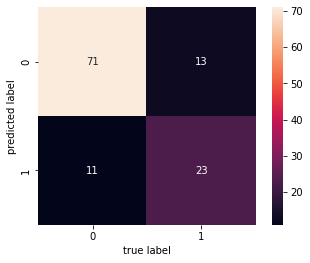

In [ ]:
mat = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',)
plt.xlabel('true label')
plt.ylabel('predicted label')

raw data : 0.7012987012987013

drop insulin : 0.7272727272727273

drop columns which feature importance < 10% : 0.5497835497835498

drop NaN : 0.7966101694915254 (392 rows)c

# KNN

In [ ]:
from pandas.core.common import random_state
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_knn))

0.7627118644067796


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        82
           1       0.63      0.53      0.58        36

    accuracy                           0.76       118
   macro avg       0.72      0.70      0.71       118
weighted avg       0.75      0.76      0.76       118



raw data : 0.6883116883116883

drop insulin : 0.7316017316017316

drop columns which feature importance < 10% : 0.6277056277056277

drop NaN : 0.7627118644067796 (392 rows)

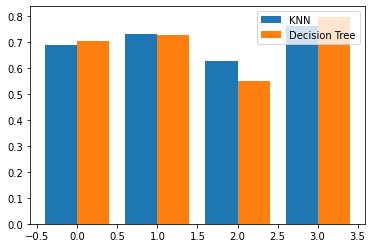

In [ ]:
knnacc = [0.6883116883116883,0.7316017316017316,0.6277056277056277,0.7627118644067796]
treeacc = [ 0.7012987012987013,0.7272727272727273, 0.5497835497835498,0.7966101694915254]
x_axis = np.arange(4)
plt.bar(x_axis -0.2, knnacc, width=0.4, label = 'KNN')
plt.bar(x_axis +0.2, treeacc, width=0.4, label = 'Decision Tree')
plt.legend()